In [5]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

num_tournaments = 10 #1000
num_rounds = 20 #'varied' #30
num_players = 13
output_dir = Path(f"C:\\output\\tournament\\genetic_algorithm\\{num_tournaments}_tournaments_{num_rounds}_rounds_{num_players}_players")
metrics_files = list(output_dir.glob('*_metrics_*'))

def process_file(file):
    tag = file.stem.split("_")[-1]
    metrics = pd.read_csv(file).rename(columns=lambda x: x.strip())
    metrics["tournament_id"] = tag
    return metrics

matches = pd.concat([process_file(f) for f in metrics_files])

In [2]:
metrics_files

[]

In [6]:
process_file(metrics_files[0])

,player,gamesPlayed,uniquePartners,uniqueOpponents,numRounds,simMatches,tournament_id
0,0,12,8,12,20,2,1574468309.7139401
1,1,10,8,10,20,2,1574468309.7139401
2,2,14,7,12,20,2,1574468309.7139401
3,3,11,6,11,20,2,1574468309.7139401
4,4,12,7,10,20,2,1574468309.7139401
5,5,12,9,9,20,2,1574468309.7139401
6,6,11,7,11,20,2,1574468309.7139401
7,7,13,9,12,20,2,1574468309.7139401
8,8,11,8,11,20,2,1574468309.7139401
9,9,15,9,12,20,2,1574468309.7139401


In [7]:
def aggregate_matches(matches):
    tour_cols = ["numRounds", "simMatches", "tournament_id"]
    tournament = (matches.groupby(tour_cols)[["gamesPlayed", "uniquePartners", "uniqueOpponents"]]
                  .agg(["mean", "min", "max", "var"]))
    tournament.columns = ["_".join(col).strip() for col in tournament.columns.values]
    tournament = tournament.reset_index()
    tournament['numPlayers'] = matches.player.count()
    return tournament

tournaments = matches.groupby("tournament_id").apply(aggregate_matches).reset_index(drop=True)

In [8]:
tournaments

,numRounds,simMatches,tournament_id,gamesPlayed_mean,gamesPlayed_min,gamesPlayed_max,gamesPlayed_var,uniquePartners_mean,uniquePartners_min,uniquePartners_max,uniquePartners_var,uniqueOpponents_mean,uniqueOpponents_min,uniqueOpponents_max,uniqueOpponents_var,numPlayers
0,20,2,1574468309.7139401,12.307692,10,15,2.064103,7.846154,6,9,0.974359,11.076923,9,12,1.076923,13
1,20,2,1574468309.7529438,12.307692,11,15,1.397436,7.538462,6,9,0.935897,10.923077,9,12,0.910256,13
2,20,2,1574468309.7919493,12.307692,10,14,1.564103,8.153846,6,11,2.307692,10.461538,9,12,1.102564,13
3,20,2,1574468309.8299136,12.307692,10,15,1.897436,6.615385,5,8,0.923077,11.076923,10,12,0.576923,13
4,20,2,1574468309.867944,12.307692,10,15,1.897436,7.692308,5,9,1.064103,11.076923,9,12,1.076923,13
5,20,2,1574468309.9169188,12.307692,11,15,1.230769,7.846154,6,10,0.974359,10.307692,8,12,1.230769,13
6,20,2,1574468309.9749207,12.307692,10,14,1.730769,7.230769,5,9,1.358974,11.230769,10,12,0.525641,13
7,20,2,1574468310.0439198,12.307692,11,15,1.730769,7.846154,6,9,1.141026,10.307692,9,11,0.730769,13
8,20,2,1574468310.0959196,12.307692,10,15,1.730769,8.153846,7,10,0.974359,10.923077,10,12,0.576923,13
9,20,2,1574468310.1489244,12.307692,10,15,2.564103,8.000000,6,10,1.166667,10.923077,10,12,0.743590,13


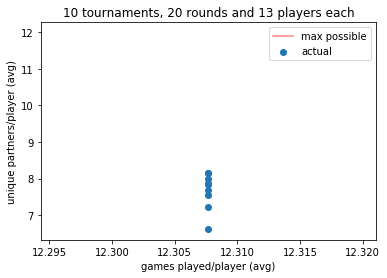

In [9]:
tournaments["max_possible_unique_partners"] = (tournaments[['numPlayers', 'gamesPlayed_mean']]
                                               .apply(lambda x: min(x.numPlayers-1, x.gamesPlayed_mean), axis=1))
possible = tournaments[['gamesPlayed_mean', 'max_possible_unique_partners']].sort_values('gamesPlayed_mean')
plt.plot(possible.gamesPlayed_mean, possible.max_possible_unique_partners, color="red", alpha=0.5,  
           label="max possible")
plt.scatter(tournaments.gamesPlayed_mean, tournaments.uniquePartners_mean, label='actual')

plt.title(f"{num_tournaments} tournaments, {num_rounds} rounds and {num_players} players each")
plt.xlabel("games played/player (avg)")
plt.ylabel("unique partners/player (avg)")
plt.legend()

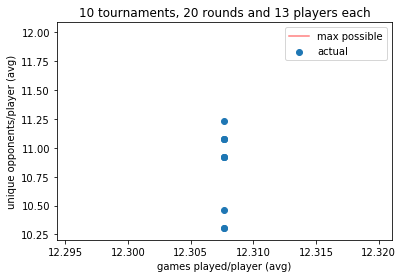

In [10]:
tournaments["max_possible_unique_opponents"] = (tournaments[['numPlayers', 'gamesPlayed_mean']]
                                               .apply(lambda x: min(x.numPlayers-1, x.gamesPlayed_mean*2), axis=1))
possible = tournaments[['gamesPlayed_mean', 'max_possible_unique_opponents']].sort_values('gamesPlayed_mean')
plt.plot(possible.gamesPlayed_mean, possible.max_possible_unique_opponents, color="red", alpha=0.5,  
           label="max possible")
plt.scatter(tournaments.gamesPlayed_mean, tournaments.uniqueOpponents_mean, label='actual')

plt.title(f"{num_tournaments} tournaments, {num_rounds} rounds and {num_players} players each")
plt.xlabel("games played/player (avg)")
plt.ylabel("unique opponents/player (avg)")
plt.legend()

In [18]:
tournaments[['numPlayers', 'gamesPlayed_mean']].apply(lambda n: print(n.numPlayers), axis=1)

38.0
27.0
48.0
56.0
11.0
32.0
45.0
31.0
15.0
69.0
61.0
42.0
68.0
42.0
55.0
51.0
19.0
58.0
27.0
61.0
51.0
64.0
31.0
18.0
94.0
66.0
94.0
96.0
83.0
48.0
23.0
21.0
38.0
18.0
60.0
65.0
53.0
53.0
31.0
40.0
59.0
44.0
97.0
87.0
98.0
56.0
92.0
39.0
21.0
70.0
27.0
92.0
34.0
43.0
87.0
74.0
95.0
37.0
61.0
45.0
38.0
49.0
47.0
67.0
54.0
48.0
11.0
57.0
82.0
90.0
97.0
65.0
34.0
87.0
10.0
15.0
66.0
44.0
20.0
45.0
73.0
63.0
82.0
21.0
28.0
31.0
86.0
95.0
30.0
86.0
70.0
24.0
91.0
86.0
10.0
17.0
96.0
38.0
41.0
57.0


0     None
1     None
2     None
3     None
4     None
      ... 
95    None
96    None
97    None
98    None
99    None
Length: 100, dtype: object

In [12]:
tournaments[tournaments.gamesPlayed_mean >= tournaments.numPlayers]

,numRounds,simMatches,tournament_id,gamesPlayed_mean,gamesPlayed_min,gamesPlayed_max,gamesPlayed_var,uniquePartners_mean,uniquePartners_min,uniquePartners_max,uniquePartners_var,uniqueOpponents_mean,uniqueOpponents_min,uniqueOpponents_max,uniqueOpponents_var,numPlayers,max_possible_unique_partners
4,30,2,201911210941093111,21.818182,20,23,0.763636,10.0,10,10,0.000000,10.000000,10,10,0.000000,11,10
8,30,2,201911210941094593,16.000000,15,17,0.285714,13.2,12,14,0.314286,13.066667,12,14,0.495238,15,14
66,30,2,201911210941100854,21.818182,20,23,0.763636,10.0,10,10,0.000000,10.000000,10,10,0.000000,11,10
74,30,2,201911210941103363,24.000000,23,25,0.444444,8.6,8,9,0.266667,9.000000,9,9,0.000000,10,9
75,30,2,201911210941104515,16.000000,15,17,0.428571,12.8,12,14,0.457143,12.533333,11,14,0.695238,15,14
94,30,2,201911210941107285,24.000000,23,25,0.666667,9.0,9,9,0.000000,9.000000,9,9,0.000000,10,9


In [6]:
tournaments[tournaments.gamesPlayed_mean > tournaments.uniquePartners_mean].numPlayers.describe()

count     6.000000
mean     12.000000
std       2.366432
min      10.000000
25%      10.250000
50%      11.000000
75%      14.000000
max      15.000000
Name: numPlayers, dtype: float64

In [7]:
tournaments[tournaments.gamesPlayed_mean <= tournaments.uniquePartners_mean].numPlayers.describe()

count    94.000000
mean     55.744681
std      24.058592
min      17.000000
25%      38.000000
50%      53.500000
75%      72.250000
max      98.000000
Name: numPlayers, dtype: float64